**<h3><center>EN2550  Exercise 10</center></h3>**
*Name - Ekanayake E.M.S.S.N.*
<br>
*Index no - 190164M*
<hr>

**01**

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([x**i*w[M-i] for i in range(0,M+1)], axis=0)

def g(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([i*x**(i-1)*w[M-i] for i in range(0,M+1)], axis=0)


**a**

Graph  1 :x =  -2.4003994283530288 f(x) =  -53.11840483760499
Graph  2 :x =  -2.4004092926048117 f(x) =  -53.118404836887514
Graph  3 :x =  2.5104174088324025 f(x) =  -9.073558171240812


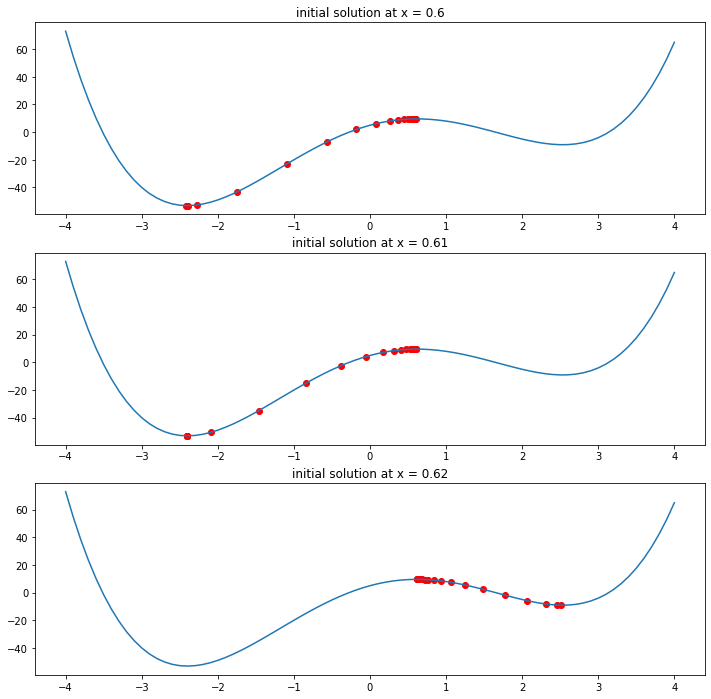

In [19]:
#changing initial solution
fig,ax = plt.subplots(3,1, figsize=(12,12))
alpha = 0.02
init_x_list = [0.6,0.61,0.62]
x_list = [0.6,0.61,0.62]
for i in range(len(x_list)):
    x_hist = np.array(x_list[i])
    fx_hist = np.array(f(x_list[i]))
    for j in range(20):
        x_list[i] = x_list[i] - alpha*g(x_list[i])
        x_hist= np.append(x_hist, x_list[i])
        fx_hist= np.append(fx_hist, f(x_list[i]))   
    print('Graph ',i+1,':x = ',x_list[i],'f(x) = ',f(x_list[i]))

    delta = 0.1
    x_ = np.arange(-4,4+delta,delta)
    ax[i].plot(x_,f(x_))
    ax[i].scatter(x_hist,fx_hist, c='r')
    ax[i].set_title('initial solution at x = '+str(init_x_list[i]))       

**b**

Graph  1 :x =  -2.4003994283530288 f(x) =  -53.11840483760499
Graph  2 :x =  -0.4376718537441433 f(x) =  -3.7432247193381363
Graph  3 :x =  2.0864539796592165 f(x) =  -6.074476851784517


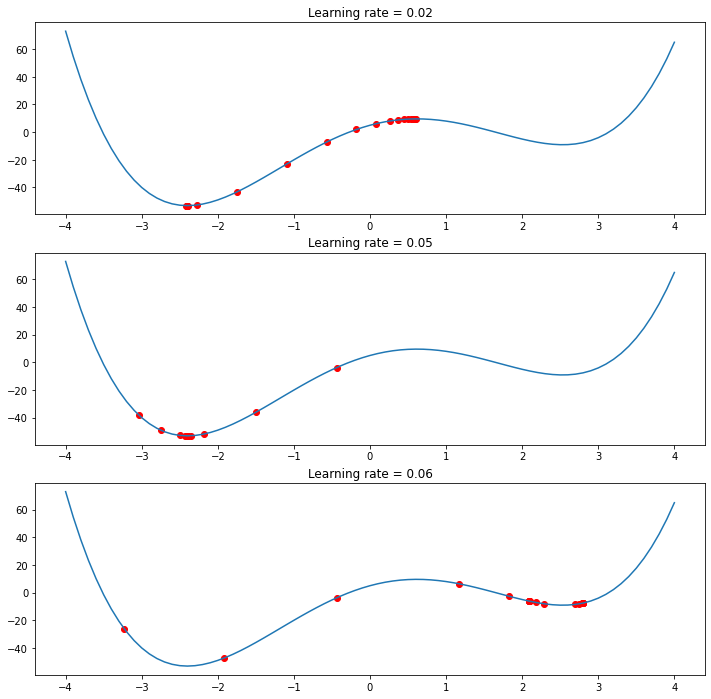

In [22]:
#changing the alpha
fig,ax = plt.subplots(3,1, figsize=(12,12))
alpha_list = [0.02,0.05,0.06]
x = 0.6
for i in range(len(alpha_list)):
    x_hist = np.array(x)
    fx_hist = np.array(f(x))
    for j in range(20):
        x = x - alpha_list[i]*g(x)
        x_hist= np.append(x_hist, x)
        fx_hist= np.append(fx_hist, f(x))   
    print('Graph ',i+1,':x = ',x,'f(x) = ',f(x))

    delta = 0.1
    x_ = np.arange(-4,4+delta,delta)
    ax[i].plot(x_,f(x_))
    ax[i].scatter(x_hist,fx_hist, c='r')
    ax[i].set_title('Learning rate = '+str(alpha_list[i]))      

**02**

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 , mnist

( x_train , y_train ),( x_test , y_test ) = cifar10.load_data ( )
# ( x_train , y_train ) , ( x_test , y_test ) = mnist . load_data ( )
print ( " x_train => " , x_train . shape )

Ntr = x_train . shape [ 0 ]
Nte = x_test . shape [ 0 ]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
x_train = x_train [ range ( Ntr ) , : ]
x_test = x_test [ range ( Nte ) , : ]
y_train = y_train [ range ( Ntr ) ]
y_test = y_test [ range ( Nte ) ]

K = len(np.unique(y_train))

y_train = tf.keras.utils.to_categorical(y_train,num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train/= 255.
x_test/= 255.

 x_train =>  (50000, 32, 32, 3)


In [28]:
# Utility function for diaplaying
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)


     # For diapaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)

In [34]:
std = 1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
lr = 1e-3
lr_decay = 0.1
epochs =11
batch_size = 100
loss_history = []
rng = np.random.default_rng(seed=0)

for e in range(epochs):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    for batch in range(Ntr//batch_size):
        batch_indices = indices[batch*batch_size:(batch+1)*batch_size]
        x = x_train[batch_indices]
        y = y_train[batch_indices]

        y_pred = x@w +b
        loss = 1./batch_size*np.square(y_pred - y).sum()
        loss_history.append(loss)

        dy_pred = 1./batch_size*2.0*(y_pred - y)
        dw = x.T @ dy_pred
        db = dy_pred.sum(axis=0)*1
        w = w - lr*dw
        b = b - lr*db

    if e%5 == 0:
        print('Iteration %d / %d: loss %f'%(e, epochs, loss))
    if e%10 == 0:
        lr *= lr_decay


Iteration 0 / 11: loss 0.813459
Iteration 5 / 11: loss 0.802912
Iteration 10 / 11: loss 0.804645


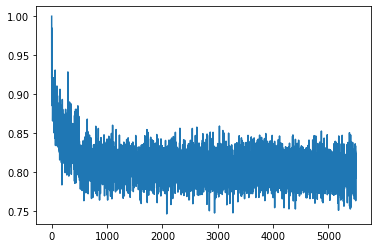

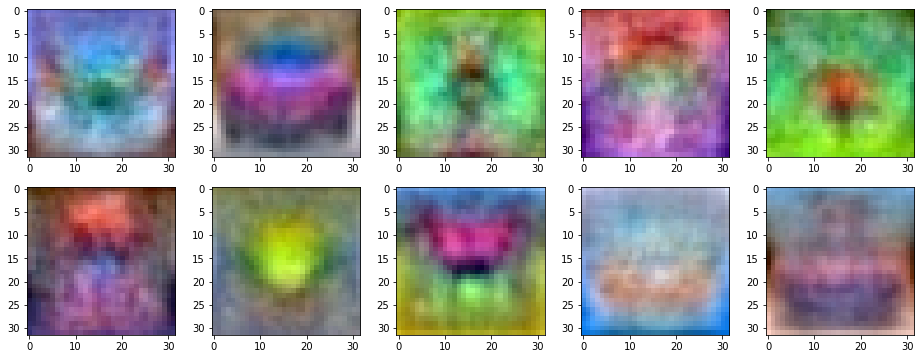

train_acc =  0.0
test_acc =  0.3879


C:\Users\hp-gaming\AppData\Local\Temp\ipykernel_22256\797452161.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))


In [35]:
y_train_pred = x_train.dot(w) + b
y_test_pred = x_test.dot(w) + b
display(y_train, y_test, y_test_pred, y_test_pred, loss_history, w, showim=True)